In [788]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json
import create_structured_mesh as msh

In [789]:
parameters_path = "../configs/test_mh/mh.json"
    
file = open(parameters_path)
config = json.load(file)
file.close()

In [790]:
# Set center
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])

# Set type
dipole_type = config["ModelConfig"]["DipoleType"]

# Set dipole
#position = (config["ModelConfig"]["Dipole"]["Position"]["x"],config["ModelConfig"]["Dipole"]["Position"]["y"])
#start = (config["Sampling"]["StartPoint"]["x"],config["Sampling"]["StartPoint"]["y"])

sample_path = config["Setup"]["OutputPath"] + config["Sampling"]["ResultFile"] + ".h5"
#fin = h5py.File(sample_path)


fin = h5py.File("/home/anne/Masterarbeit/masterarbeit/2d/results/test_mh/mh_test_3_64_pi_18_0.h5")
samples = np.array( fin['/samples'] )[:,:]
fin.close()

n = len(samples[0])

if dipole_type == 'Radial':
    #s_ref = utility_functions.get_radial_dipole(position,center)
    sample_dict = {
        "x": samples[0],
        "y": samples[1]
    }
else:
    #rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
    #s_ref = utility_functions.get_dipole(position,center,rho)
    sample_dict = {
        "x": samples[0],
        "y": samples[1],
        "rho": samples[2]
    }

sample_dataset = az.dict_to_dataset(sample_dict)


In [791]:
#n_split = int(len(samples[0])/2)
#print("Effective sample size: " + str(az.ess(np.array([samples[0,:n_split],samples[0,n_split:]]))))

print("")
print("Effective sample size: " + str(az.ess(sample_dataset)))
print("Autocorrelation time: " + str(n/az.ess(sample_dataset)))


Effective sample size: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 70.94
    y        float64 31.22
    rho      float64 63.93
Autocorrelation time: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 2.819e+03
    y        float64 6.407e+03
    rho      float64 3.128e+03


In [792]:
print("")
print("Effective sample size: " + str(az.ess(samples[0][:int(n/2)])) + " " + str(az.ess(samples[0][int(n/2):])))
print("Effective sample size: " + str(az.ess(samples[1][:int(n/2)])) + " " + str(az.ess(samples[1][int(n/2):])))
print("Effective sample size: " + str(az.ess(samples[2][:int(n/2)])) + " " + str(az.ess(samples[2][int(n/2):])))




Effective sample size: 45.08950224869368 29.570150013300765
Effective sample size: 33.06835626448776 21.46827746808509
Effective sample size: 25.992860303276462 25.335777356498177


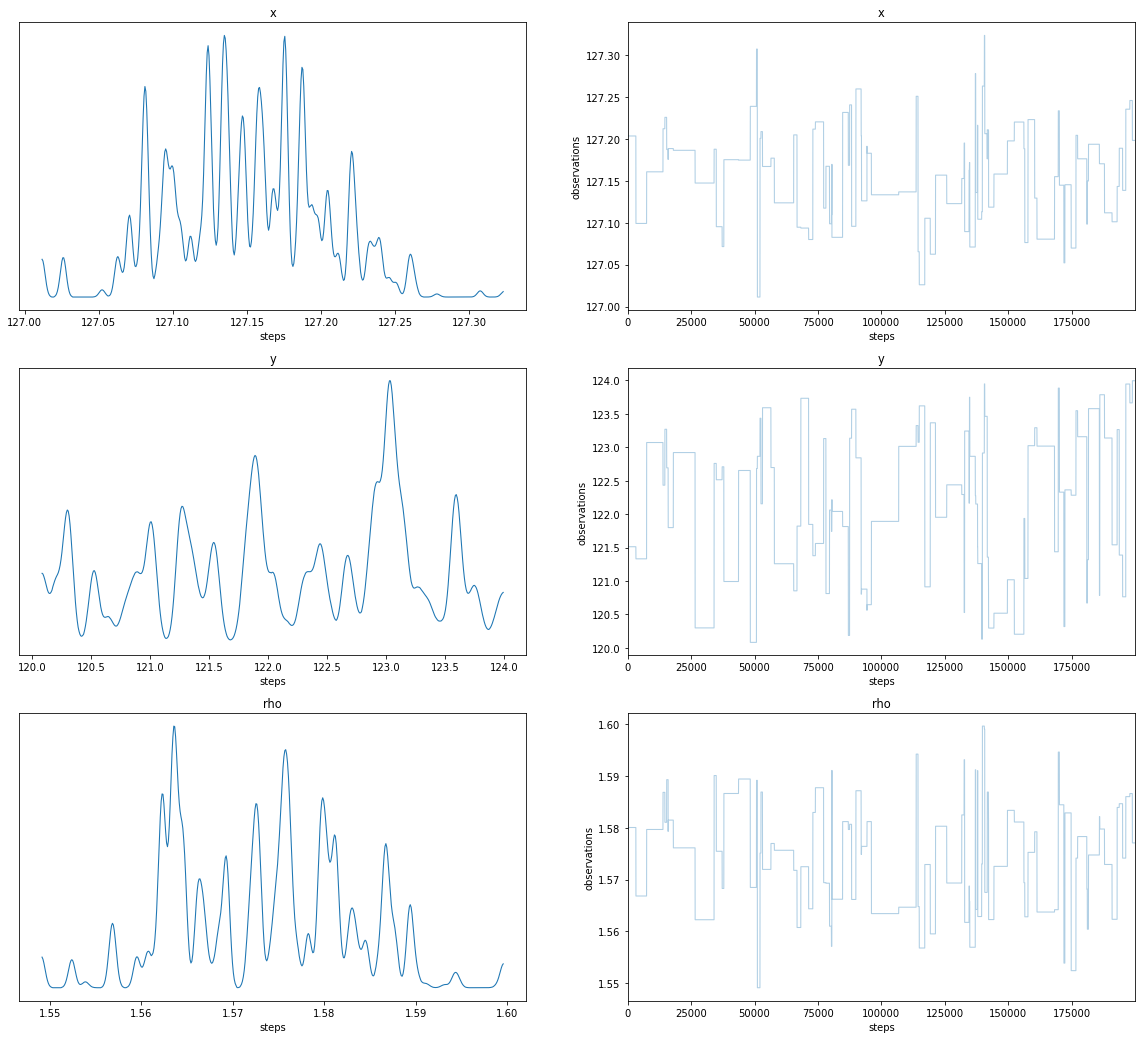

In [793]:
fig, axes = plt.subplots(3, 2, figsize=(20,18))

for ax in axes.flatten():
    ax.set_xlabel('steps')

axes[0,1].set_ylabel('observations')
axes[1,1].set_ylabel('observations')
axes[2,1].set_ylabel('observations')
#axes[0,1].set_ylim(60,130)

p = az.plot_trace(sample_dataset, axes=axes)



Text(0.5, 0, 'lag')

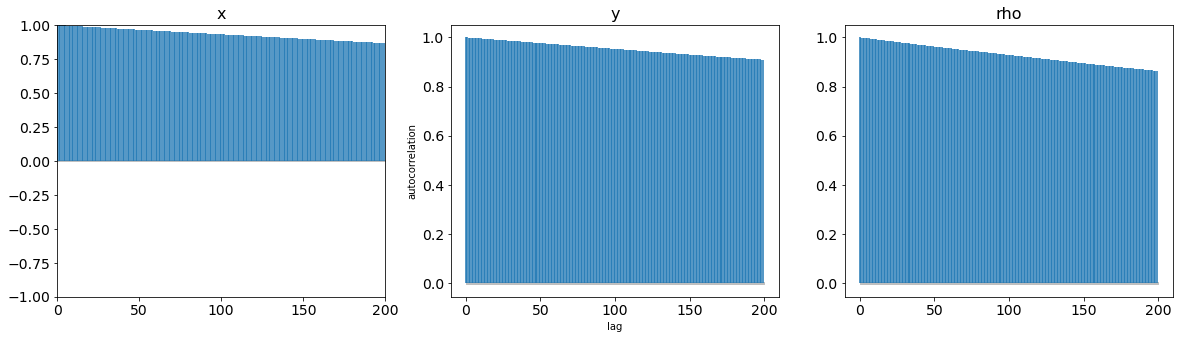

In [794]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

p = az.plot_autocorr(sample_dataset, ax = axes, max_lag=200, combined=True, figsize=(20,4))

axes[1].set_ylabel('autocorrelation')
axes[1].set_xlabel('lag')


In [ ]:
#p = az.plot_ess(sample_dataset, kind='local')
#p = az.plot_ess(sample_dataset, kind='quantile')

#fig, axes = plt.subplots(1, 2, figsize=(20,5))
#p = az.plot_ess(sample_dataset, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
#p = az.plot_ess(sample_dataset_1, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
